# Follicles detection

A. BELLAMINE 12/01/2021

Working notebook for the follicles detection project.

In [2]:
from submissions.ab_submission import object_detector
import importlib

In [3]:
importlib.reload(object_detector)

<module 'submissions.ab_submission.object_detector' from 'c:\\Users\\4078182\\Personal\\git\\follicles_detection\\submissions\\ab_submission\\object_detector.py'>

# Data exploration

In [265]:
import glob
import imageio
from matplotlib import pyplot as plt
import pandas as pd

In [31]:
train_files = glob.glob("./data/train/*.jpg")
test_files = glob.glob("./data/test/*.jpg")
train_label = pd.read_csv("./data/train/labels.csv")
test_label = pd.read_csv("./data/test/labels.csv")

train_data = dict([(x.split("\\")[-1], imageio.imread(x)) for x in train_files])
test_data = dict([(x.split("\\")[-1], imageio.imread(x)) for x in test_files])

In [311]:
def describe_data(data, labels):

    # Counting the data
    n_data = len(data)
    n_labels = labels.shape[0]

    # Computing box size
    box_size = (labels["xmax"]-labels["xmin"])*(labels["ymax"]-labels["ymin"])

    # Resolution and ratio
    resolution = labels["width"]*labels["height"]
    ratio = labels["width"]/labels["height"]

    # Number of class and labels
    print(f"The train dataset is composed of {n_data} images and {n_labels} labels")

    # Distribution of the class
    print("Distribution of the class")
    labels["class"].value_counts().plot(kind="bar")
    plt.show()

    # Distribution of the box size
    print("Distribution of the box size")
    box_size.plot(kind="kde")
    plt.show()

    # Distribution of the resolution and the ratio
    print("Distribution of the resolution and the ratio")
    resolution.plot(kind="kde")
    plt.show()

    ratio.plot(kind="kde")
    plt.show()

    # Some examples
    print("Somes data examples")
    idx = np.random.randint(0, len(data)-1, 6)

    fig, axs = plt.subplots(3,2)
    axs = axs.flatten()
    imgs = list(data.values())
    for i in range(len(idx)):
        axs[i].imshow(imgs[idx[i]])    

The train dataset is composed of 29 images and 652 labels
Distribution of the class


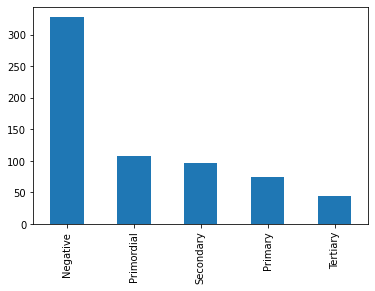

Distribution of the box size


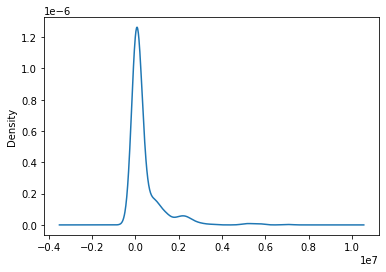

Distribution of the resolution and the ratio


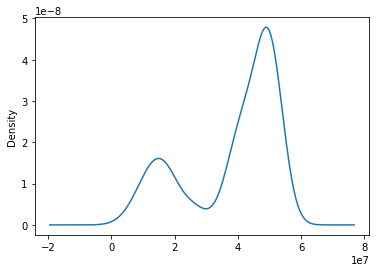

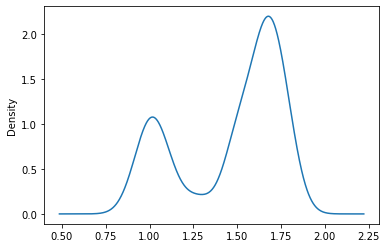

Somes data examples


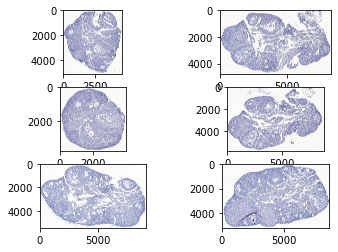

In [312]:
describe_data(train_data, train_label)

The train dataset is composed of 5 images and 70 labels
Distribution of the class


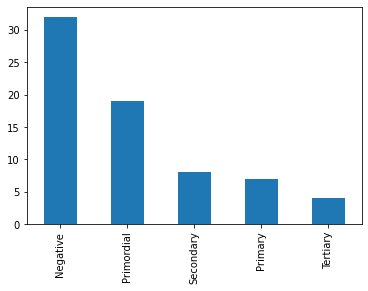

Distribution of the box size


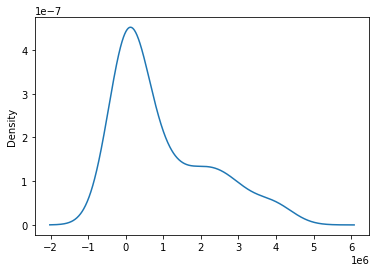

Distribution of the resolution and the ratio


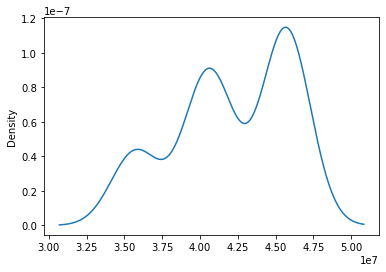

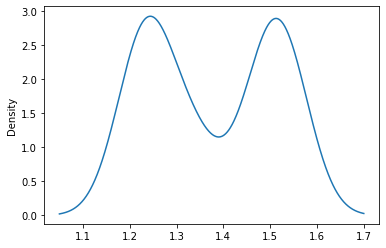

Somes data examples


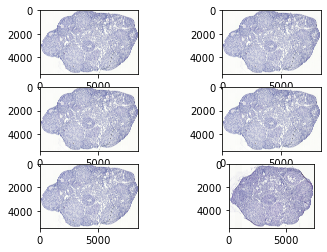

In [313]:
describe_data(test_data, test_label)

# Ideas

- [ ] Use pre-train network
- [ ] Use super-resolution
- [ ] Data Augmentation
- [ ] Task :
  - [ ] All in one in CNN
  - [ ] Multiples jobs : 1. detect follicle, 2. classify it
- [ ] Add featuresz

# Test

## Downloading pre-trained

That could be useful :
- Histology VGG : https://zenodo.org/record/1420524#.Yd7tE9_jJPY
  - License : CC 4.0
- Own VGG from public histology dataset
- Original VGG 
- Lower resolution for follicle detection then increase resolution and classify the follicle

# Data augmentation

TODO :
- [ ] Rotation
- [ ] Mirroring

# Models

In [225]:
from torch import nn
import numpy as np
import torch
import torchvision.models as models

In [237]:
inception_v3 = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to C:\Users\4078182/.cache\torch\hub\checkpoints\inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:03<00:00, 32.9MB/s] 


In [232]:
test_tensors = [torch.tensor(x, dtype=torch.float32) for x in test_data.values()]

In [255]:
test = test_tensors[0].unsqueeze(3).permute(3, 2, 0, 1)

In [256]:
test.shape

torch.Size([1, 3, 5540, 8228])